# Basic FULMAR usage. Using K2-109 as an example
This system contains two known exoplanets. For more information, have a look at [Barros et al. 2017](https://www.aanda.org/articles/aa/pdf/2017/12/aa31276-17.pdf)

Let's start by importing common modules

In [1]:
import fulmar
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from transitleastsquares import transit_mask

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Define target

In [2]:
lc_targ = fulmar.target('K2-109') # aka. HD 106315 

### Update stellar parameters if necessary

In [3]:
# K2-109 parameters from Barros et al. 2017 (https://www.aanda.org/articles/aa/pdf/2017/12/aa31276-17.pdf)
lc_targ.R_star = 1.296
lc_targ.R_star_max = 0.058
lc_targ.R_star_min = 0.058

lc_targ.M_star = 1.091
lc_targ.M_star_max = 0.036
lc_targ.M_star_min = 0.036

## Build the lightcurve

In [4]:
lc_targ.build_lightcurve(author='EVEREST')

Searching for lightcurves


['K2 Campaign 102']
1 Lightcurves found


time,flux,flux_err,cadn,fraw,cadenceno,fraw_err,quality,fcor,cbv01,cbv02,cbv03,cbv04,cbv05,cbv06,exptime
,,,,electron / s,,electron / s,,electron / s,,,,,,,s
Time,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64
2749.5899533941338,0.9919362273818925,nan,129231.0,3616934.469760895,129231.0,47.413345756122425,524288,3618895.8239213014,1.0,4.032601813062183,3.721325487340294,-0.6272998722503135,2.7580352239694506,0.9449693607767682,1800.0
2749.6103854284593,0.9919057528017547,nan,129232.0,3616898.694656372,129232.0,47.4206060553783,0,3618797.79577493,1.0,4.036445303100602,3.709970058424757,-0.639482652969744,2.7337745018705517,0.9413711769034284,1800.0
2749.6308173623256,0.9920318018415252,nan,129233.0,3617448.0032958984,129233.0,47.43482627636655,0,3619268.647123106,1.0,4.040263871939855,3.698637940508874,-0.6516019999249221,2.7095909556591535,0.9377823016121527,1800.0
2749.6512491959584,0.9919802015869569,nan,129234.0,3617286.1815719604,129234.0,47.44625835297297,0,3619093.66213457,1.0,4.044057555765272,3.687329095681801,-0.6636580207756357,2.685484485807006,0.9342027182885964,1800.0
2749.6716812293525,0.992301349055998,nan,129235.0,3618496.683452606,129235.0,47.469152065594365,0,3620273.5298203984,1.0,4.047826390762182,3.676043486032692,-0.6756508231816731,2.6614549927858597,0.930632410318415,1800.0
2749.6921131622876,0.9923487483914822,nan,129236.0,3618750.0302505493,129236.0,47.48211093867445,0,3620458.2428743644,1.0,4.051570413115917,3.664781073650703,-0.6875805148028225,2.6375023770674657,0.9270713610872642,1800.0
2749.712544994756,0.9923954335698577,nan,129237.0,3618955.9937667847,129237.0,47.49448540389917,0,3620640.277803066,1.0,4.055289659011805,3.6535418206249886,-0.6994472032988717,2.613626539123574,0.9235195539807992,1800.0
2749.732977027219,0.9925266324082855,nan,129238.0,3619466.253112793,129238.0,47.507834395667736,0,3621129.43718082,1.0,4.058984164635178,3.642325689044705,-0.7112509963296089,2.589827379425935,0.9199769723846757,1800.0


### Alternatively, build the lightcurve from files, for example data reduced with POLAR

In [ ]:
filelist = [your_files_here]

In [ ]:
lc_targ.build_lightcurve(filelist=filelist, author='AUTHOR')

### Plot the light curve for a quick visualisation

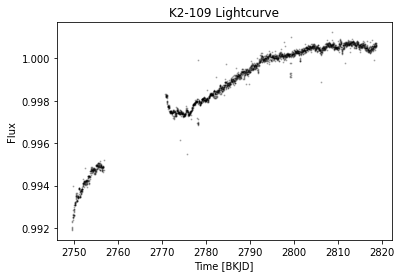

In [5]:
plt.plot(lc_targ.ts_stitch.time.value, lc_targ.ts_stitch['flux'],'k.', markersize=1.8, alpha = 0.25)

plt.xlabel('Time [{}]'.format(str(lc_targ.ts_stitch.time.format).upper()))
plt.ylabel('Flux')
plt.title(lc_targ.K2 + ' Lightcurve')
# plt.xlim(2350,2356)
# plt.ylim(0.9985,1.0015)
plt.show()

### Mask Outliers

In [6]:
m1 = lc_targ.mask_outliers(sigma=4)

#### Plot the light curve with outliers highlighted

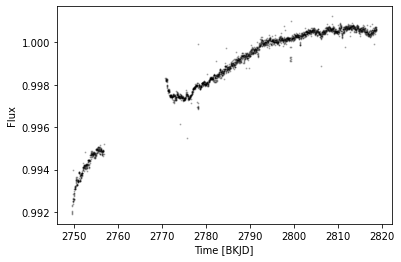

In [7]:
plt.plot(lc_targ.ts_stitch.time.value, lc_targ.ts_stitch['flux'],'k.', markersize=1.8, alpha = 0.25)
plt.plot(lc_targ.ts_stitch.time.value[~m1], lc_targ.ts_stitch['flux'][~m1],'o', color='xkcd:orange', markersize=8, alpha = 0.5)

plt.xlabel('Time [{}]'.format(str(lc_targ.ts_stitch.time.format).upper()))
plt.ylabel('Flux')
# plt.xlim(2350,2356)
# plt.ylim(0.985,1.015)
plt.show()

#### Remove the outliers if necessary.

In [11]:
lc_targ.ts_stitch = lc_targ.ts_stitch[m1]

## Clean the light curve / correct activity

### Using a Savistzky-Golay filter:

In [9]:
lc_targ.clean_subt_activity_flatten(sigma=3,
        wl=37,
        time_window=18*u.h,
        polyorder=2,
        return_trend=False,
        remove_outliers=True,
        break_tolerance=5,
        niters=3,
        mask=None)

# You might face issues with Astropy >= 5.0 where flatten gives TypeError: "cannot write to unmasked output"
# The issue comes from Lightkurve and a pull request has been made: https://github.com/lightkurve/lightkurve/pull/1162/commits/05034f4bbd8e6a40f8efd9cfa1f108a36ddc0872

time,flux,flux_err,cadn,fraw,cadenceno,fraw_err,quality,fcor,cbv01,cbv02,cbv03,cbv04,cbv05,cbv06,exptime
,,,,electron / s,,electron / s,,electron / s,,,,,,,s
Time,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64
2749.5899533941338,0.9974494072046971,nan,129231.0,3616934.469760895,129231.0,47.413345756122425,524288,3618895.8239213014,1.0,4.032601813062183,3.721325487340294,-0.6272998722503135,2.7580352239694506,0.9449693607767682,1800.0
2749.6103854284593,0.9974552745389408,nan,129232.0,3616898.694656372,129232.0,47.4206060553783,0,3618797.79577493,1.0,4.036445303100602,3.709970058424757,-0.639482652969744,2.7337745018705517,0.9413711769034284,1800.0
2749.6308173623256,0.9976185472245636,nan,129233.0,3617448.0032958984,129233.0,47.43482627636655,0,3619268.647123106,1.0,4.040263871939855,3.698637940508874,-0.6516019999249221,2.7095909556591535,0.9377823016121527,1800.0
2749.6512491959584,0.997603175397708,nan,129234.0,3617286.1815719604,129234.0,47.44625835297297,0,3619093.66213457,1.0,4.044057555765272,3.687329095681801,-0.6636580207756357,2.685484485807006,0.9342027182885964,1800.0
2749.6716812293525,0.9979626771452772,nan,129235.0,3618496.683452606,129235.0,47.469152065594365,0,3620273.5298203984,1.0,4.047826390762182,3.676043486032692,-0.6756508231816731,2.6614549927858597,0.930632410318415,1800.0
2749.6921131622876,0.9980468850219955,nan,129236.0,3618750.0302505493,129236.0,47.48211093867445,0,3620458.2428743644,1.0,4.051570413115917,3.664781073650703,-0.6875805148028225,2.6375023770674657,0.9270713610872642,1800.0
2749.712544994756,0.9981303806009645,nan,129237.0,3618955.9937667847,129237.0,47.49448540389917,0,3620640.277803066,1.0,4.055289659011805,3.6535418206249886,-0.6994472032988717,2.613626539123574,0.9235195539807992,1800.0
2749.732977027219,0.9982988878195049,nan,129238.0,3619466.253112793,129238.0,47.507834395667736,0,3621129.43718082,1.0,4.058984164635178,3.642325689044705,-0.7112509963296089,2.589827379425935,0.9199769723846757,1800.0


### Alternatively, using GP: 

In [10]:
lc_targ.clean_subt_activity_GP(
            timeseries=None,
            bin_duration=60 * u.min,
            period_min=0.2,
            period_max=100.0,
            tune=2500,
            draws=2500,
            chains=2,
            target_accept=0.95,
            ncores=None,
            return_trend=False,
            remove_outliers=True,
            sigma_out=3,
            mask=None)

 /home/jrodrigues/fulmar_venv/lib64/python3.9/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice /home/jrodrigues/fulmar_venv/lib64/python3.9/site-packages/astropy/timeseries/downsample.py:26: RuntimeWarning: Mean of empty slice /home/jrodrigues/fulmar_venv/lib64/python3.9/site-packages/astropy/timeseries/downsample.py:29: RuntimeWarning: Mean of empty slice

guessed period is 24.03185320009876 days


optimizing logp for variables: [f, log_dQ, log_Q0, log_period, sigma_rot, rho, sigma, log_jitter, mean]


message: Optimization terminated successfully.
logp: -2793.754777544708 -> -2258.111803771446
Multiprocess sampling (2 chains in 8 jobs)
NUTS: [f, log_dQ, log_Q0, log_period, sigma_rot, rho, sigma, log_jitter, mean]


Sampling 2 chains for 2_500 tune and 2_500 draw iterations (5_000 + 5_000 draws total) took 118 seconds.


time,flux,flux_err,cadn,fraw,cadenceno,fraw_err,quality,fcor,cbv01,cbv02,cbv03,cbv04,cbv05,cbv06,exptime
,,,,electron / s,,electron / s,,electron / s,,,,,,,s
object,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64
2749.5899533941338,0.998349433848371,nan,129231.0,3616934.469760895,129231.0,47.413345756122425,524288,3618895.8239213014,1.0,4.032601813062183,3.721325487340294,-0.6272998722503135,2.7580352239694506,0.9449693607767682,1800.0
2749.6103854284593,0.9983187622396653,nan,129232.0,3616898.694656372,129232.0,47.4206060553783,0,3618797.79577493,1.0,4.036445303100602,3.709970058424757,-0.639482652969744,2.7337745018705517,0.9413711769034284,1800.0
2749.6308173623256,0.9984457325683745,nan,129233.0,3617448.0032958984,129233.0,47.43482627636655,0,3619268.647123106,1.0,4.040263871939855,3.698637940508874,-0.6516019999249221,2.7095909556591535,0.9377823016121527,1800.0
2749.6512491959584,0.9983939071581265,nan,129234.0,3617286.1815719604,129234.0,47.44625835297297,0,3619093.66213457,1.0,4.044057555765272,3.687329095681801,-0.6636580207756357,2.685484485807006,0.9342027182885964,1800.0
2749.6716812293525,0.9987166345406551,nan,129235.0,3618496.683452606,129235.0,47.469152065594365,0,3620273.5298203984,1.0,4.047826390762182,3.676043486032692,-0.6756508231816731,2.6614549927858597,0.930632410318415,1800.0
2749.6921131622876,0.9987638059203047,nan,129236.0,3618750.0302505493,129236.0,47.48211093867445,0,3620458.2428743644,1.0,4.051570413115917,3.664781073650703,-0.6875805148028225,2.6375023770674657,0.9270713610872642,1800.0
2749.712544994756,0.998809794888955,nan,129237.0,3618955.9937667847,129237.0,47.49448540389917,0,3620640.277803066,1.0,4.055289659011805,3.6535418206249886,-0.6994472032988717,2.613626539123574,0.9235195539807992,1800.0
2749.732977027219,0.9989407930835639,nan,129238.0,3619466.253112793,129238.0,47.507834395667736,0,3621129.43718082,1.0,4.058984164635178,3.642325689044705,-0.7112509963296089,2.589827379425935,0.9199769723846757,1800.0


### Plot the corrected light curve

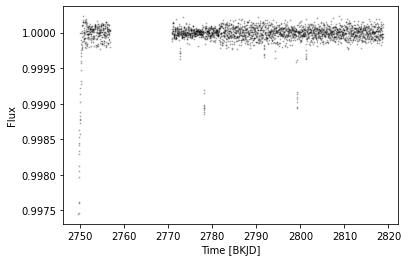

In [10]:
plt.plot(lc_targ.ts_clean.time.value, lc_targ.ts_clean['flux'],'k.', markersize=1.8, alpha = 0.25)

plt.xlabel('Time [{}]'.format(str(lc_targ.ts_stitch.time.format).upper()))
plt.ylabel('Flux')
# plt.xlim(2350,2356)
# plt.ylim(0.985,1.015)
plt.show()

#### Looks like there's something wrong at the begginning of our data. For now, lets mask it out.

In [11]:
debut_mask = np.array(lc_targ.ts_clean.time.value < 2752.5)

## Look for transits using TLS

### Look for the first exoplanet

In [12]:
perio_results1 = lc_targ.tls_periodogram(cleaned=True, n_transits_min=2, mask=debut_mask)

Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 44 durations
Searching 2342 data points, 6881 periods from 0.602 to 33.099 days
Using all 8 CPU threads


100%|██████████████████████████████████████████████████████████████████| 6881/6881 periods | 00:20<00:00


Searching for best T0 for period 21.06392 days


 /home/jrodrigues/testenv/lib64/python3.9/site-packages/transitleastsquares-1.0.31-py3.9.egg/transitleastsquares/main.py:411: UserWarning: 1 of 3 transits without data. The true period may be twice the given period.

#### Plot the TLS periodogram 

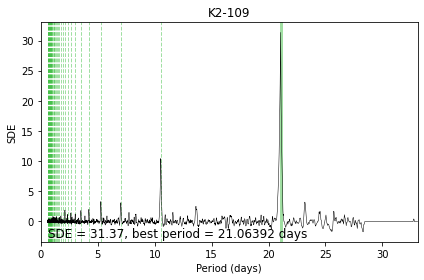

In [13]:
fulmar.perioplot(perio_results1, lc_targ.K2, folder="K2-109/", pl_n=1, maxper=None, savefig=False)

#### Plot the resulting model to have a quick visual check

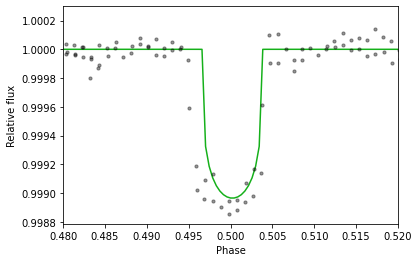

In [14]:
fulmar.modelplot(lc_targ.tls_results)

#### Optimize the transit parameters. **_Be careful it assumes circular orbit_**

running on 8 cores
mean           -3.22
log_ror        -3.22
log_period     -0.92
t0             -0.92
log_dur        -3.22
b_impact__     -1.39
obs           215.17
Name: Log-probability of test_point, dtype: float64


optimizing logp for variables: [log_dur, b, log_ror]


message: Optimization terminated successfully.
logp: 202.27788474824652 -> 329.8381013996262
optimizing logp for variables: [mean]


message: Optimization terminated successfully.
logp: 329.8381013996262 -> 329.9332573296841
optimizing logp for variables: [b, log_dur, t0, log_period, log_ror, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 329.9332573296841 -> 335.29514335086077
optimizing logp for variables: [b, log_dur, t0, log_period, log_ror, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 202.27788474824652 -> 335.2951433508669
Multiprocess sampling (2 chains in 8 jobs)
NUTS: [b, log_dur, t0, log_period, log_ror, mean]


Sampling 2 chains for 2_500 tune and 2_500 draw iterations (5_000 + 5_000 draws total) took 58 seconds.
The number of effective samples is smaller than 25% for some parameters.


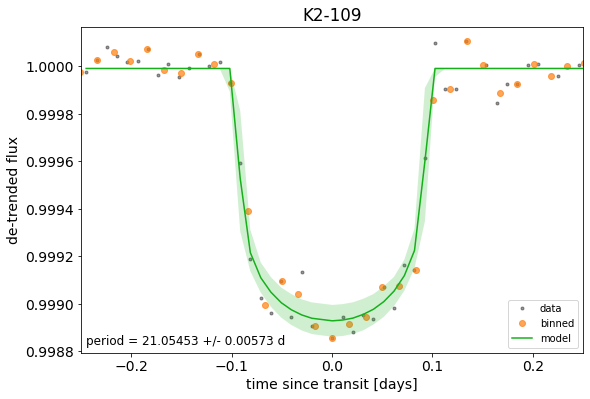

In [15]:
p, t0, dur, depth, ab, flat_samps = fulmar.params_optimizer(lc_targ.ts_clean, lc_targ.tls_results.period, lc_targ.tls_results.T0, 1-lc_targ.tls_results.depth, lc_targ.ab, lc_targ.R_star, lc_targ.K2, tran_window=0.25, ncores=None, mask=None)

#### Mask intransit data

In [18]:
intransit = transit_mask(lc_targ.ts_clean.time.value, p, 1.3*dur, t0) # True when datapoints are in transit

#### Combine intransit mask with the initial mask

In [19]:
p1_mask = np.logical_or(debut_mask, intransit)

#### Plot the lightcurve with transits highlighted

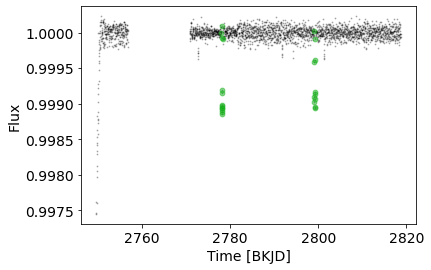

In [20]:
plt.plot(lc_targ.ts_clean.time.value, lc_targ.ts_clean['flux'],'k.', markersize=1.8, alpha = 0.25)
plt.plot(lc_targ.ts_clean.time.value[intransit], lc_targ.ts_clean['flux'][intransit],'o', color='xkcd:green', markersize=4.8, alpha = 0.5)

plt.xlabel('Time [{}]'.format(str(lc_targ.ts_stitch.time.format).upper()))
plt.ylabel('Flux')
#plt.xlim(2749,2752)
# plt.ylim(0.985,1.015)
plt.show()

### Look for the second exoplanet

In [21]:
perio_results2 = lc_targ.tls_periodogram(cleaned=True, n_transits_min=2, period_min=0.9, mask=p1_mask) 

Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 44 durations
Searching 2318 data points, 5707 periods from 0.9 to 33.099 days
Using all 8 CPU threads


100%|██████████████████████████████████████████████████████████████████| 5707/5707 periods | 00:17<00:00


Searching for best T0 for period 9.55586 days


#### Plot the TLS periodogram 

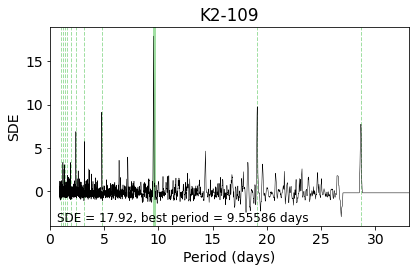

In [22]:
fulmar.perioplot(perio_results2, lc_targ.K2, folder="K2-109/", pl_n=2, maxper=None, savefig=False)
# perioplot(results, lc_targ.K2, folder="K2-109/", num=1, maxper=50, savefig=False)

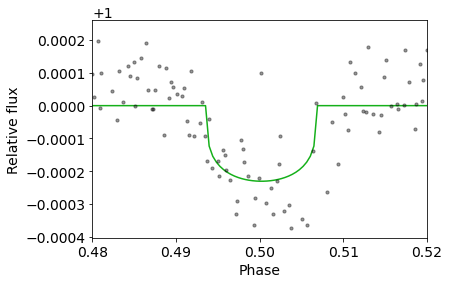

In [23]:
fulmar.modelplot(lc_targ.tls_results)

#### Visualize where the transits lay in the lightcurve

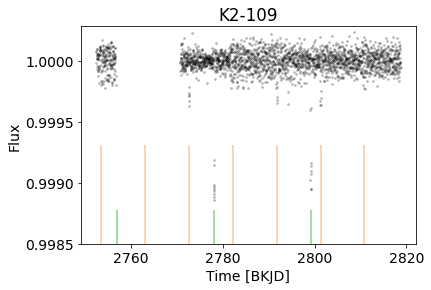

In [24]:
plt.plot(lc_targ.ts_clean.time.value[~debut_mask], lc_targ.ts_clean['flux'][~debut_mask],'ko', markersize=1.8, alpha = 0.2)

plt.xlabel('Time [{}]'.format(str(lc_targ.ts_stitch.time.format).upper()))
plt.ylabel('Flux')
#plt.xlim(2749,2752)
# plt.ylim(0.985,1.015)

for n in perio_results1.transit_times:
    plt.axvline(n, alpha=0.4, lw=2, ymax=0.15, color='xkcd:green')
for n in perio_results2.transit_times:
    plt.axvline(n, alpha=0.3, lw=2, ymax=0.45, color='xkcd:orange')

plt.title(lc_targ.K2)

plt.ylim(0.9985,1.00028)
plt.show()

#### Optimize the transit parameters. **_Be careful it still assumes circular orbit_**

running on 8 cores
mean           -3.22
log_ror        -3.22
log_period     -0.92
t0             -0.92
log_dur        -3.22
b_impact__     -1.39
obs           951.62
Name: Log-probability of test_point, dtype: float64


optimizing logp for variables: [log_dur, b, log_ror]


message: Optimization terminated successfully.
logp: 938.7314070773815 -> 992.3434057514368
optimizing logp for variables: [mean]


message: Optimization terminated successfully.
logp: 992.3434057514368 -> 997.8685515283529
optimizing logp for variables: [b, log_dur, t0, log_period, log_ror, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 997.8685515283529 -> 1005.5500559403897
optimizing logp for variables: [b, log_dur, t0, log_period, log_ror, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 938.7314070773815 -> 1005.3873774223697
Multiprocess sampling (2 chains in 8 jobs)
NUTS: [b, log_dur, t0, log_period, log_ror, mean]


Sampling 2 chains for 2_500 tune and 2_500 draw iterations (5_000 + 5_000 draws total) took 86 seconds.
The number of effective samples is smaller than 10% for some parameters.


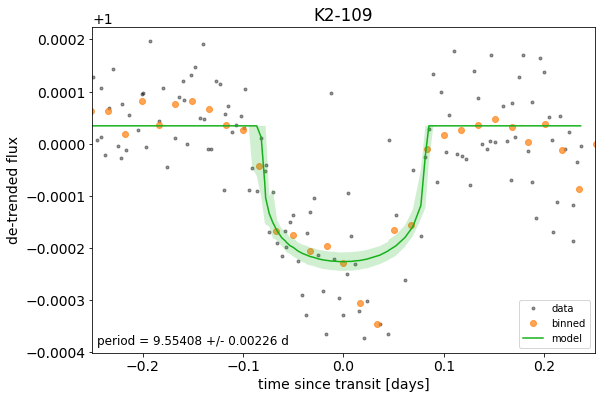

In [25]:
p_1, t0_1, dur_1, depth_1, ab_1, flat_samps_1 = fulmar.params_optimizer(lc_targ.ts_clean, lc_targ.tls_results.period, lc_targ.tls_results.T0, 1-lc_targ.tls_results.depth, lc_targ.ab, lc_targ.R_star, lc_targ.K2, tran_window=0.25, ncores=None, mask=~p1_mask)

#### Mask intransit data

In [26]:
intransit2 = transit_mask(lc_targ.ts_clean.time.value, p_1, 1.3*dur_1, t0_1) # True when datapoints are in transit

#### Combine intransit mask with the initial mask

In [27]:
p2_mask = np.logical_or(p1_mask, intransit2)

#### Plot the lightcurve with transits highlighted

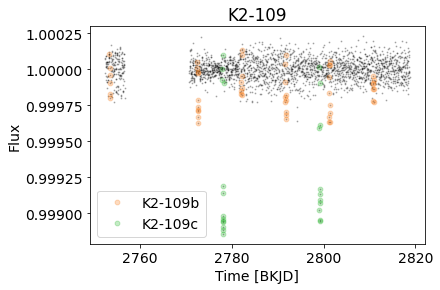

In [28]:
plt.plot(lc_targ.ts_clean.time.value[~debut_mask], lc_targ.ts_clean['flux'][~debut_mask],'k.', markersize=1.8, alpha = 0.25)
plt.plot(lc_targ.ts_clean.time.value[intransit2], lc_targ.ts_clean['flux'][intransit2],'o', color='xkcd:orange', markersize=4.8, alpha = 0.25, label='K2-109b')
plt.plot(lc_targ.ts_clean.time.value[intransit], lc_targ.ts_clean['flux'][intransit],'o', color='xkcd:green', markersize=4.8, alpha = 0.25, label='K2-109c')


plt.xlabel('Time [{}]'.format(str(lc_targ.ts_stitch.time.format).upper()))
plt.ylabel('Flux')
#plt.xlim(2749,2752)
# plt.ylim(0.985,1.015)
plt.title(lc_targ.K2)
plt.legend()
plt.show()

### Look for a possible third exoplanet ?

In [29]:
perio_results3 = lc_targ.tls_periodogram(cleaned=True, n_transits_min=2, mask=p2_mask)

Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 44 durations
Searching 2266 data points, 6881 periods from 0.602 to 33.099 days
Using all 8 CPU threads


100%|██████████████████████████████████████████████████████████████████| 6881/6881 periods | 00:15<00:00


Searching for best T0 for period 12.50044 days


 /home/jrodrigues/testenv/lib64/python3.9/site-packages/transitleastsquares-1.0.31-py3.9.egg/transitleastsquares/stats.py:458: RuntimeWarning: divide by zero encountered in double_scalars

#### Plot the TLS periodogram 

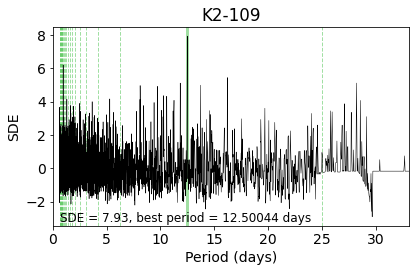

In [30]:
fulmar.perioplot(perio_results3, lc_targ.K2, folder="K2-109/", pl_n=3, maxper=None, savefig=False)
# perioplot(results, lc_targ.K2, folder="K2-109/", num=1, maxper=50, savefig=False)

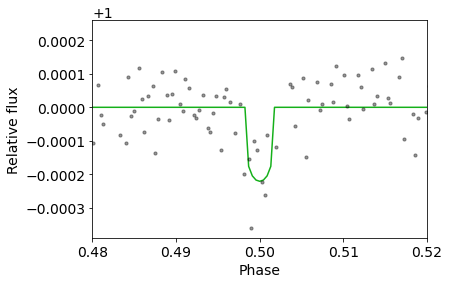

In [31]:
fulmar.modelplot(lc_targ.tls_results)

In [32]:
perio_results3.SDE, perio_results3.FAP

(7.933769512184782, 0.00160064)

**SDE < 9**, which is the normally accepted threshold for a detection. We can end it there, as we can assume the system only contains two planets.

In [33]:
print("In the paper, K2-109b period is announced to be 9.55237 days, in our quick look we found it at {0:.5f}.\nRegarding K2-109c, the paper announces 21.05704 days, we found {1:.5f}. \nNot bad !".format(p_1, p))

In the paper, K2-109b period is announced to be 9.55237 days, in our quick look we found it at 9.55405.
Regarding K2-109c, the paper announces 21.05704 days, we found 21.05469. 
Not bad !


## Print version of Fulmar

In [34]:
fulmar.utils.print_version()

Fulmar 0.1.8 (5 Apr 2022)
